# Data analytics for engineers 



In this tutorial we will see:
- Exploration of multivariate datasets
- Dimension reduction techniques (PCA)
- Clustering methods

We will use the following libraries:
- `sklearn` 
- `scipy`
- `pandas`
- `numpy`
- `matplotlib`



In [19]:
from sklearn import datasets, decomposition, cluster
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Iris dataset

In [20]:
data=datasets.load_iris()

In [21]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [22]:
df=pd.DataFrame(data['data'],columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.species=data.target_names[data.target]

In [23]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [24]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


What are the main information from the table above?

*There are 150 plants in the data*

*The sepal length has a mean of 5.85 cm and a standard deviation of 0.8*

*The sepal width has a mean of 3.05 cm and a standard deviation of 0.43*

*The petal length has a mean of 3.75 cm and a standard deviation of 7.76 (similar mean as sepal width but a lot more variation).*

*The petal width has a mean of 1.19 cm and a standard deviation of 0.76*

*There seems to be relatively more variation in the petal than in the sepal.*

## Data exploration

### Visualisation

Let's visualise the distribution of each of the four variables: petal length, petal width, sepal length, sepal width.

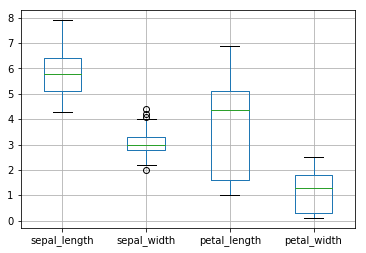

In [25]:
df.boxplot()

We can also look at these distribution for each of the three species

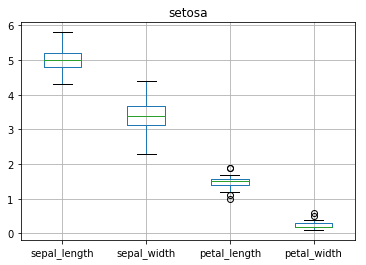

In [26]:
g=df[data.target==0].boxplot()
plt.title(data.target_names[0])
plt.show(g)

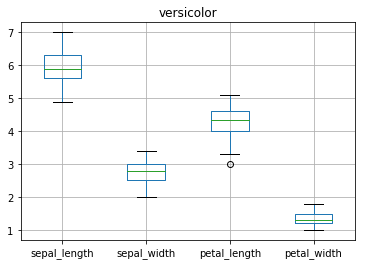

In [27]:
g=df[data.target==1].boxplot()
plt.title(data.target_names[1])
plt.show(g)

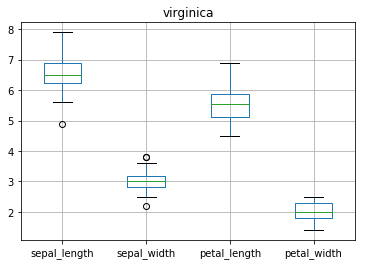

In [28]:
g=df[data.target==2].boxplot()
plt.title(data.target_names[2])
plt.show(g)

Then let's visualise the relationship between each pair of variables. Because there are 4 variables, we need to represent 6 pairs of variables.

Text(0,0.5,'petal length')

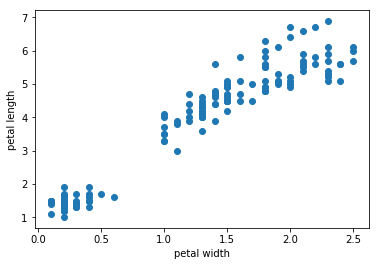

In [29]:
plt.scatter(df.petal_width,df.petal_length)
plt.xlabel("petal width")
plt.ylabel("petal length")


Text(0,0.5,'sepal width')

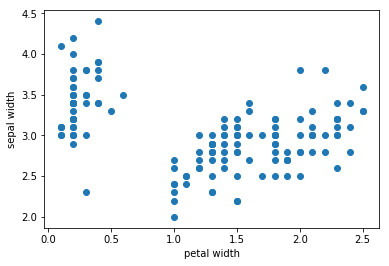

In [30]:
plt.scatter(df.petal_width,df.sepal_width)
plt.xlabel("petal width")
plt.ylabel("sepal width")

Text(0,0.5,'sepal length')

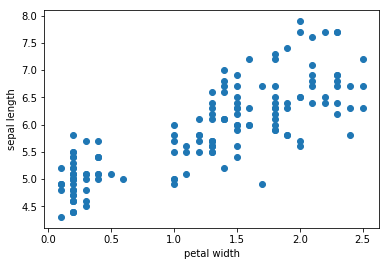

In [31]:
plt.scatter(df.petal_width,df.sepal_length)
plt.xlabel("petal width")
plt.ylabel("sepal length")

Text(0,0.5,'sepal length')

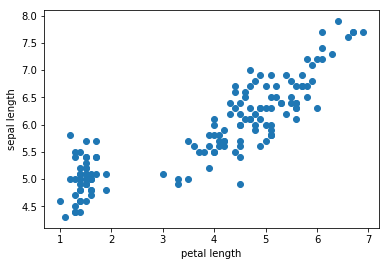

In [32]:
plt.scatter(df.petal_length,df.sepal_length)
plt.xlabel("petal length")
plt.ylabel("sepal length")

Text(0,0.5,'sepal length')

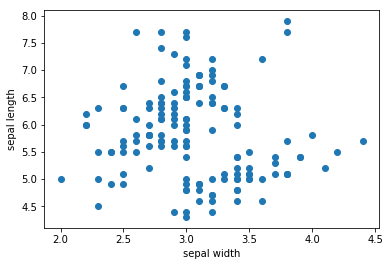

In [33]:
plt.scatter(df.sepal_width,df.sepal_length)
plt.xlabel("sepal width")
plt.ylabel("sepal length")

From all these plot describe the variables and how they are linked to the species.

*Sepal length, petal width and petal length are linked. When one increases so does the other.*

*Sepal width does not seem link to the other variables.*

*Setosa has small flowers, Virginica has big flowers.*

### Correlation

The correlation `r` is a measure of **association between two variables**. It takes a values between -1 and 1:
- $r<0$ = negative association (if one variable increases the other one decreases)
- $r>0$ = positive association (if one variable increases the other one increases as well)
- $r=0$ = no association between the variables

The formula is:

$$ r= \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2}\sqrt{\sum(y_i-\bar{y})^2}}$$


In [34]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Describe what the correlation above mean. Which variables seem to be the most similar? dissimilar?

*Petal length and petal width have the highest correlation (r=0.96), meaning these variables are the most similar.*

*Petal length and sepal width are also highly correlated (r=0.87).*

*Petal width and sepal length are also highly correlated (r=0.82).*

*These three variables are positively correlated, when one increases so do the others*

*Sepal width has  small negative correlation withthe others. It decreases when the others increases.*

*The smaller correlation is between sepal width and sepal length (r=-0.11) they are almost independent*

## Dataset reduction

In the Iris dataset has 4 variables. For many reasons we may want to reduce the information into 2 dimensions only. 

### PCA

Principal Component Analysis (PCA) is a dimension reduction method. Each sample is project onto two dimensions, as well as each variable. The two dimension are built to retain as much information as possible, (in statistical term maximize the variance).

The first step before doing a pca is to standardized the variables, i.e. transform all data so that each variable has a mean of $0$ and a standard deviation of $1$.

In [35]:
x=StandardScaler().fit_transform(df.values)

We can check the effect of the standardisation on the data using a boxplot:

{'boxes': [<matplotlib.lines.Line2D at 0x221934d0630>,
 'caps': [<matplotlib.lines.Line2D at 0x221934da160>,
 'fliers': [<matplotlib.lines.Line2D at 0x221934dae80>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x221934daa20>,
 'whiskers': [<matplotlib.lines.Line2D at 0x221934d0780>,
  <matplotlib.lines.Line2D at 0x22193504a20>]}

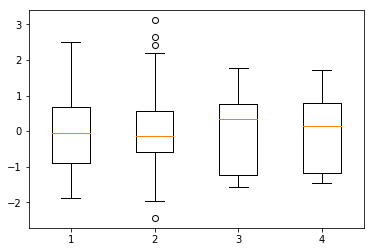

In [36]:
plt.boxplot(x)

Then we do the PCA using `decompisition.PCA`

In [37]:
iris_pca = decomposition.PCA(n_components=2)# create a pca
principalComponents = iris_pca.fit_transform(x) # fit the pca to this dataset
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])# save the output 


PCA has a set of outputs, that are all informative, that we will look at in details. It can be analysis based solely on numbers or based on plots.

Doing a PCA we project sample in $k=2$ (or more) dimensions, instead of the orginal $p$ dimensions. This creates two new variables (or axis or PC). These PCs are linear combination of the original variables:

$PC1=a_1\times sepal.length + b_1\times sepal.width +c_1 \times petal.length + d_1 \times petal.width$

$PC2=a_2\times sepal.length + b_2\times sepal.width +c_2 \times petal.length + d_2 \times petal.width$

The first element of this method is to know how much of the orginal information (variance) is maintained by keeping only $k$ dimensions. 


In [38]:
iris_pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

This output tells us that PC1 represents 72.8% of the original variance and PC2 23.0% of the orginal variance. Hence in total, by using two variables (PC1 and PC2) instead of the original four variables, we keep 95.8%  of the information.


In [39]:
iris_pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

This outputs gives us the relative value of each original variable on te new PC1 and PC2.  They are basically the $a$,$b$,$c$ and $d$ of the previous equation so:

$PC1=0.52\times sepal.length -0.26\times sepal.width +0.58 \times petal.length + 0.56 \times petal.width$

$PC2=0.37\times sepal.length + 0.92\times sepal.width =0.021\times petal.length +0.065 \times petal.width$

This means that the first PC is mostly influenced by the all measures and the second PC is mostly influenced by the sepal width.

Now let's look at how the flowers are projected into the 2 new dimensions. The following dataframe contains the coordinates of each sample in the new dimension:

In [40]:
principalDf 

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


It is usually easier to represent all this information via plots, to undertansd what is happening in the data. First we can plot all the samples against the new dimensions:

Text(0.5,0,'PC2')

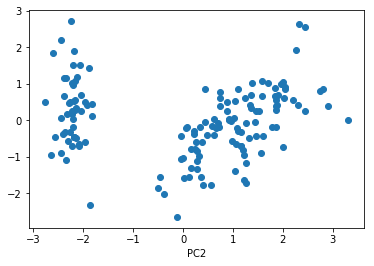

In [41]:
plt.scatter(principalDf.PC1,principalDf.PC2)
plt.xlabel("PC1")
plt.xlabel("PC2")

`principalDf` now contains the new coordinate of each sample in the new two dimensions

Now let's look at how the species matches the new coordinates.

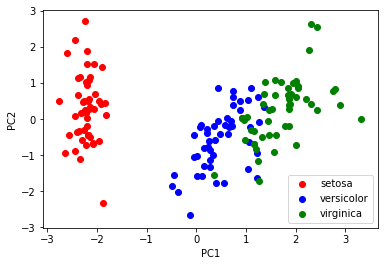

In [42]:
plt.scatter("PC1","PC2",data=principalDf[data.target==0],c="r",label=data.target_names[0])
plt.scatter("PC1","PC2",data=principalDf[data.target==1],c="b",label=data.target_names[1])
plt.scatter("PC1","PC2",data=principalDf[data.target==2],c="g",label=data.target_names[2])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

In [43]:
iris_pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [ ]:
plt.scatter("PC1","PC2",data=principalDf[data.target==0],c="r",label=data.target_names[0])
plt.scatter("PC1","PC2",data=principalDf[data.target==1],c="b",label=data.target_names[1])
plt.scatter("PC1","PC2",data=principalDf[data.target==2],c="g",label=data.target_names[2])
for i in range(4):
    plt.arrow(0,0,iris_pca.components_[0][i],iris_pca.components_[1][i])
    plt.text(iris_pca.components_[0][i],iris_pca.components_[1][i],data.feature_names[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("IRIS PCA")
plt.legend()

The last plot, which is the main output of PCA, show that setosas plant are different than versicolor and virgonica. They have smaller petal width and length, and smaller sepal length.
It also show that virginica are largely bigger than versicolor.

From this we can identify which are the important variable in separating different type of flowers. This is a first step towards clustering.

*Exercise: on a separate notebook, read the dataset `databeer.csv` perform a small exploration and a PCA on the data.*

## Clustering

PCA was the first step towards clusering, i.e. grouping samples that are most alike. There exists many clustering methods but we will cover only two main ones: hierarchical clustering and k-means.

### Hierarchical cluster

Hierarchical clustering methods are a set of methods that join individuals that are the closest to each other to form clusters, until all individuals are joined in  $k$ clusters, $k$ being the desired number of cluster. In some implementation it is not always necessary to specify $k$ beofre running the algorithm, but in `scikit` it is.

There are different variation of the method, based on the *linkage* method, i.e. how do you define  the distance between two clusters. In scikit there are 3 methods available `complete` `ward` and  `average`

In [ ]:
mycluster = cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
mycluster.fit_predict(df)  

The cluster attribution for each sample can be found in the `mycluster` object

In [ ]:
mycluster.labels_

We can plot the results, by coloring each sample by its cluster

In [ ]:
clust1=np.where(mycluster.labels_==0) ## the rows of all individuals that belong to cluster 1
clust2=np.where(mycluster.labels_==1) ## the rows of all individuals that belong to cluster 2
clust3=np.where(mycluster.labels_==2) ## the rows of all individuals that belong to cluster 3

In [ ]:
plt.scatter(df.sepal_length.iloc[clust1],df.sepal_width.iloc[clust1],label="cluster 1",c="b")
plt.scatter(df.sepal_length.iloc[clust2],df.sepal_width.iloc[clust2],label="cluster 1",c="r")
plt.scatter(df.sepal_length.iloc[clust3],df.sepal_width.iloc[clust3],label="cluster 1",c="g")
plt.legend()
plt.title("Kmean clustering of Iris")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
plt.scatter(df.petal_length.iloc[clust1],df.petal_width.iloc[clust1],label="cluster 1",c="b")
plt.scatter(df.petal_length.iloc[clust2],df.petal_width.iloc[clust2],label="cluster 1",c="r")
plt.scatter(df.petal_length.iloc[clust3],df.petal_width.iloc[clust3],label="cluster 1",c="g")
plt.legend()
plt.title("Kmean clustering of Iris")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

Describe what you see above, and the characteristics of each cluster

*Write your answer here*

Perform a new  clustering by using another linkage method `ward` or `average` and compare the results

In [ ]:
#write your code here

*Write your answer here*

### K-means

Kmean is a heuristics algorithm. Given a dataset with p variable, you must tell the algorithm how many cluster you want.

For the Iris dataset, we want to find 3 different group of plants.

In [ ]:
kmeans= cluster.KMeans(n_clusters=3)

After creating the kmean instance, we fit it to te data:

In [ ]:
kmeans.fit(df)

The output is 3 clusters. Each of them has a center with coordinates in the 4 original dimensions. Each sample is now assigned to a cluster. 

In [ ]:
kmeans.cluster_centers_ # the coordinates of the center, i.e. their value for each variable

In [ ]:
kmeans.labels_ # the cluster attributed to each sample

In [ ]:
clust1=np.where(kmeans.labels_==0) ## the rows of all individuals that belong to cluster 1
clust2=np.where(kmeans.labels_==1) ## the rows of all individuals that belong to cluster 2
clust3=np.where(kmeans.labels_==2) ## the rows of all individuals that belong to cluster 3

In [ ]:
plt.scatter(df.sepal_length.iloc[clust1],df.sepal_width.iloc[clust1],label="cluster 1",c="b")
plt.scatter(df.sepal_length.iloc[clust2],df.sepal_width.iloc[clust2],label="cluster 1",c="r")
plt.scatter(df.sepal_length.iloc[clust3],df.sepal_width.iloc[clust3],label="cluster 1",c="g")
plt.legend()
plt.title("Kmean clustering of Iris")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
plt.scatter(df.petal_length.iloc[clust1],df.petal_width.iloc[clust1],label="cluster 1",c="b")
plt.scatter(df.petal_length.iloc[clust2],df.petal_width.iloc[clust2],label="cluster 1",c="r")
plt.scatter(df.petal_length.iloc[clust3],df.petal_width.iloc[clust3],label="cluster 1",c="g")
plt.legend()
plt.title("Kmean clustering of Iris")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

Describe what you see above, and the characteristic of each cluster

*Write your answer here*

Finally we can compare these clusters to the known species, by doing a cross tabulation of the variables that contains the cluster for each sample, and the one that contains the species for each sample

In [ ]:
species=data.target_names[data.target]
clust=kmeans.labels_
pd.crosstab(clust,species)

Here all setosa belong to cluster 1, Versicolor are mostly in cluster 0 and virginica are mostly in cluster 2

Exercise: repeat this last operation for the neighbour joining result. Conclude on which algorithm is the best in this case

In [ ]:
# write code here

*Exercice: Perform a cluster of the beer dataset, on the same notebook that you created for PCA*

## Digits dataset

Digits recognition is now automatically performed with clusting method. Do a PCA and a cluster analysis of the digits dataset. Check how well your model predict the digit. ( you may want to do it on a sperate notebook).

In [ ]:
dd=datasets.load_digits()
print(dd["DESCR"])